<h1 align=center>Credit Card Transactions Fraud Detection</h1>
<h4 align=center> By Buhari Shehu</h4>

<img src="https://cdn.pixabay.com/photo/2016/12/19/08/39/mobile-phone-1917737_960_720.jpg" alt="computer_and phone"  >

## Table of Contents
<ul>
<li><a href="#intro"> 1. Introduction</a></li>
<li><a href="#eda">2. Exploratory Data Analysis (EDA) </a></li>
<li><a href="#model">3. Model Selection and Evaluation</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
<li><a href="#ref">5. References</a></li>
</ul>

<div id='intro'></div>

## 1. Introduction
Credit card fraud is a type of cybercrime that involves the illegal use of payment cards to inflict financial loss on unsuspecting victims.  It can happen when a victim is socially engineered to divulge his card's confidential information or carry out a transaction on behalf of the criminal. And in some cases, it may happen without the knowledge of the victim.[ (Wikipedia Contributors, 2019)](https://en.wikipedia.org/wiki/Credit_card_fraud) The consequences of credit card fraud include financial losses to customers, businesses, banks, the economy, and psychological distress. In many countries, credit card fraud runs in billions. For instance in the US alone in 2020 credit card fraud amounted to 28.58 billion USD. [(Anon, 2022)](https://moneytransfers.com/news/content/credit-card-fraud-statistics). The total value of transactions using cards issued in SEPA amounted to €5.16 trillion in 2019, of which €1.87 billion was fraudulent. [(European Central Bank, 2021)](https://www.ecb.europa.eu/pub/cardfraud/html/ecb.cardfraudreport202110~cac4c418e8.en.html) And the year 2021 saw a 46% YoY increase in suspected fraudulent transactions across the globe. [(Chargebacks911, 2022)](https://chargebacks911.com/credit-card-fraud-statistics/)

With the rise of artificial intelligence (AI), machine learning (ML) algorithms are used in detecting credit card fraud. In this project, anonymized credit card transaction data will be used to train various ML algorithms to build a model that can predict fraudulent transactions. The outcome can be used to prevent such transactions. The metric that will be used in evaluating the models is**`recall`**. **`Recall`** was chosen because it measures the ability of the model to identify the minority class, which is fraud. The `recall` is calculated as the ratio between the number of `positive samples` correctly classified as `positive` to the total number of `positive samples`. The higher the `recall`, the more `positive samples (fraud)` detected. [Javatpoint. (n.d.)](https://www.javatpoint.com/precision-and-recall-in-machine-learning)


### 1.1 Dataset description

The dataset was obtained from Kaggle [(Machine Learning Group - ULB, 2018)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) and it contains two-day credit card transactions of Europeans in the month of September 2013. The Class column of the dataset consists of 492 ones (1) for fraudulent transactions and 284,315 zeros (0) for the non-fraudulent transactions. Thus the dataset is highly imbalance.

With the exception of `time, amount, and class`, all other features of the dataset were anonymized and transformed using principal component analysis (PCA).


### 1.2 Installing and importing dependencies
The following packages are essential to running this project successfully: `numpy, pandas, matplotlib, seaborn, sklearn, sidetable, imbalanced-learn and xgboost`.

***Insatalling some of the dependencies***

In [1]:
# installing some modules
! pip install -q sidetable
! pip install -q imbalanced-learn

# installing xgboost
! pip -q install xgboost

# installing the data source
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

***Importing the required packages***

In [2]:
# import data analysis tools
import pandas as pd
import numpy as np

# import data visualisation tools
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import the model evaluation module
from sklearn.metrics import recall_score

# import warnings
import warnings 
warnings.filterwarnings('ignore')

### 1.3 Loading the dataset

In [3]:
# download the dataset from Kaggle
! kaggle datasets download -d mlg-ulb/creditcardfraud -q

# unzip the dataset
! unzip -q creditcardfraud.zip

 71% 47.0M/66.0M [00:00<00:00, 176MB/s]
100% 66.0M/66.0M [00:00<00:00, 190MB/s]


In [4]:
# load the dataset
transactions_df = pd.read_csv('creditcard.csv')
transactions_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


<div id='eda'></div>

## 2. Exploratory Data Analysis (EDA)
In this section, we are going to explore the dataset to glean some insights before fitting various machine learning (ML) models to the dataset. 

In [5]:
# print the concise summary of the dataset
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

From the above output, we can note that the dataset:
- has 30 features of float type and a target variable, `class` of int type
- has 284,807 entries with no null values
- most of the features are anonymized.

Thus, the dataset needs little or no preprocessing. 

**What is the distribution of the target variable: `Class`?**

In [6]:
# get the predictor and the predicted variables
X = transactions_df.drop(['Class'], axis=1)
y = transactions_df['Class']

In [7]:
# get the percentage of each Class value
import sidetable
transactions_df.stb.freq(['Class'], style=True)

,Class,count,percent,cumulative_count,cumulative_percent
0,0,"284,315",99.83%,"284,315",99.83%
1,1,492,0.17%,"284,807",100.00%


The dataset is highly imbalanced. The positive class `1` (fraud) only constitute 0.17% of both classes. Thus, the counts need to be transformed to logarithmic values so that both bars will appear in the visualisation. There are various techniques for handling imbalanced data. However, those techniques will not be considered in this project.

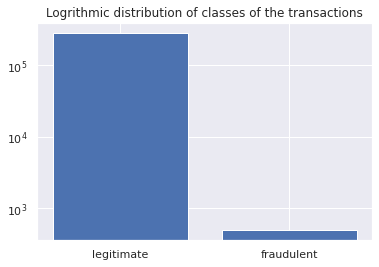

In [8]:
# bar plot of log of counts of the Class values
plt.bar(y.value_counts().index, y.value_counts().values)
plt.yscale("log")
plt.xticks(ticks=[0,  1], labels=['legitimate', 'fraudulent'])
plt.title('Logrithmic distribution of classes of the transactions');

**What is the amount and the proportion of the fraudulent transactions?**

In [9]:
# total transactions
total_transactions_mil = round((sum(transactions_df['Amount'])/10e6), 2)
total_fraudulent_transactions = round((sum(transactions_df[transactions_df['Class'] == 1]['Amount'])/10e3), 2)
print('Total amount of transaction is {} million Euros and the fraudulent transactions totaled to {} thousand Euros.'.format(total_transactions_mil, total_fraudulent_transactions))
print('The percentage of the amount of fraudulent transactions is {} %'.format(round(total_fraudulent_transactions/(total_transactions_mil*10), 2)))

Total amount of transaction is 2.52 million Euros and the fraudulent transactions totaled to 6.01 thousand Euros.
The percentage of the amount of fraudulent transactions is 0.24 %


**Is there a difference between the distribution of fraudulent and non-fraudulent transactions?**

***Fraudulent transactions***

In [10]:
# fraudulent transactions
fraudulent_df = transactions_df[transactions_df['Class'] == 1]
fraudulent_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1


In [11]:
# summary stat of fraudulent transactions amount
fraudulent_df[['Amount']].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


From the summary statistics above we can observe that:
- although the total amount of fraudulent transactions is small compared to the amount of total transactions, the maximum fraudulent amount is 2,125.87 which is close to the maximum transaction amount of the legitimate transactions
- the minimum value of the fraudulent transaction is zero, this indicates failed fraudulent transactions
- 25 % of the fraudulent transactions a has amount less than or equal to 1. These transactions fall into the category of credit card fraud called **carding**. Carding is a type of fraud that deduct small amounts from the victims' account to purchase things like Amazon gift cards. 

***Legitimate transactions***

In [12]:
# legitimate transactions
non_fraudulent_df = transactions_df[transactions_df['Class'] == 0]
non_fraudulent_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [13]:
# summary stat of legitimate transactions amount
non_fraudulent_df[['Amount']].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


***The graphical representation of the transaction amount distributions***

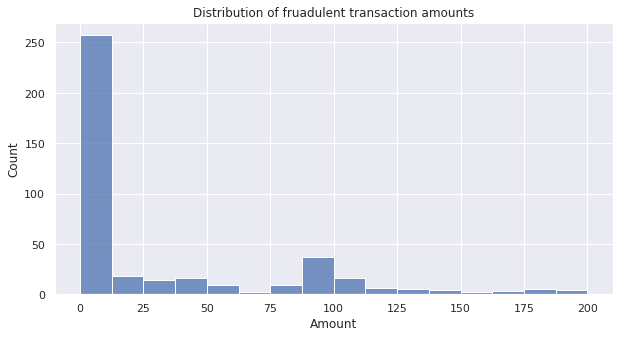

In [14]:
# plot distribution of fruadulent transaction amounts
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Distribution of fruadulent transaction amounts')
sns.histplot(data=fraudulent_df['Amount'], binrange=[0, 200], ax=ax);

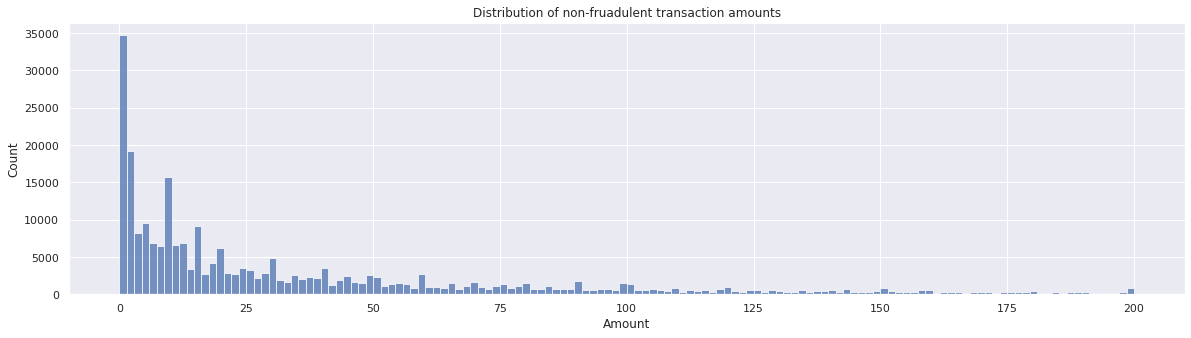

In [15]:
# plt distribution of non-fruadulent transaction amounts
fig, ax = plt.subplots(figsize=(20, 5))
plt.title('Distribution of non-fruadulent transaction amounts')
sns.histplot(data=non_fraudulent_df['Amount'],  binrange=[0, 200], ax=ax);

From the two histograms above we can observe that both transactions have right-skewed distributions as such their patterns do not differ significantly.

<div id='model'></div>

## 3. Model Selection and Evaluation
In this section, various ML models will be trained and evaluated to choose the best model for the dataset. The detection of the positive class (fraud) is the aim of this project. Thus, recall which gives the proportion of correctly identified fraud (**True Positive**) in the total positive detections (**True Positive + False Negative**) will be used to evaluate the models.

### 3.1 Preprocessing




In [16]:
# getting the predictor and the predicted variables
X = transactions_df.drop(['Class'], axis=1)
y = transactions_df['Class']

**Scaling**

The dataset has 30 features of varying scales. These varying scales greatly affect the Euclidean distance on which most of the classifiers depend. To solve this issue, the data is normalized using the `standard scaler` as follows:

In [17]:
# create standardization object
scaler = StandardScaler()
# save standardized features into new variable
X_scaled = scaler.fit_transform(X)

**Splitting the dataset**

The dataset will be split into training and test sets to enable model evaluation.

In [18]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=10)

### 3.2 Training

In this subsection, various classifiers namely: `logistic regressor, support vector machine (SVM), multinomial logistic regressor, k-nearest neighbours (KNN), AdaBoost and GradientBoost classifiers` will be trained and the best amongst them will be chosen for the dataset. To ease this task a function that will evaluate the recall of each model will be created.

***Initializing the models***

In [19]:
# instantiating the models
logistic_regressor = LogisticRegression(multi_class='ovr')
support_vector_machine = svm.SVC(probability=True)
k_nearest_neighbours = KNeighborsClassifier(n_neighbors=10)
xgboost_classifier = XGBClassifier()
ada_classifier = AdaBoostClassifier(n_estimators=200, random_state= 40)
gradient_classifier = GradientBoostingClassifier()

***Creating the function***

In [20]:
def model_eval(model, X_train, y_train, X_test, y_test):
    """
takes a model with train and test sets and
  returns the recall value of such model
  """
  # train
  
  # predict
  y_pred = model.predict(X_test)
  # evaluating the recall
  recall = recall_score(y_test, y_pred)
  return round(recall, 2)


***Choosing the best model***

In [21]:
# get the models list
model_list = [logistic_regressor, support_vector_machine, k_nearest_neighbours, 
              xgboost_classifier, ada_classifier, gradient_classifier]
# get model names
model_names = ['logistic_regressor', 'support_vector_machine', 'k_nearest_neighbours', 
              'xgboost_classifier', 'ada_classifier', 'gradient_classifier']
# get list of recall values for each model
recall = [model_eval(model, X_train, y_train, X_test, y_test) for model in model_list]
# sort models by recall
model_performance_df = pd.DataFrame(recall, index=model_names, columns=['recalls'])
model_performance_df.sort_values(by='recalls', ascending=False)

,recalls
gradient_classifier,0.82
xgboost_classifier,0.81
ada_classifier,0.80
support_vector_machine,0.72
k_nearest_neighbours,0.72
logistic_regressor,0.67


<div id='conclusions'></div>

## 4. Conclusion

Credit card fraud is one of the cybercrimes that has both psychological and financial implications and it is on the increase. In this project, the two-day credit card transactions dataset was analysed and modelled using various machine learning algorithms. `Gradient Boosting Classifier` was found to be the best classifier with a recall value of 0.82. This means the model can detect 82 % of the total frauds in the dataset. The model can be deployed to monitor real-time transactions and flag suspicious ones.

<div id='ref'></div>

## 5. References

1. Wikipedia Contributors. (2019, October 7). Credit card fraud. Retrieved from Wikipedia website: https://en.wikipedia.org/wiki/Credit_card_fraud
2. Anon (2022). 15 Shocking Credit Card Fraud Statistics & Facts for 2022. [online] Available at: https://moneytransfers.com/news/content/credit-card-fraud-statistics.
3. European Central Bank, (2021). Seventh report on card fraud. www.ecb.europa.eu, [online] (2021). Available at: https://www.ecb.europa.eu/pub/cardfraud/html/ecb.cardfraudreport202110~cac4c418e8.en.html.
4. Chargebacks911. (2022). Key Credit Card Fraud Statistics to Know for 2022. [online] Available at: https://chargebacks911.com/credit-card-fraud-statistics/.
5. Javatpoint. (n.d.). Precision and Recall in Machine Learning - Javatpoint. [online] Available at: https://www.javatpoint.com/precision-and-recall-in-machine-learning.
6. Machine Learning Group - ULB (2018, March). Credit Card Fraud Detection. [online] Available at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

Let's connect

https://www.linkedin.com/in/buhari-shehu/

Github repo

https://github.com/BuhariS/credit-card-fraud-detection


‌
‌